In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [2]:
# Van der Pol oscillator
#http://kitchingroup.cheme.cmu.edu/blog/2013/02/02/Solving-a-second-order-ode/

mu = 1.
def f(t, y):
    # dx/dt = mu(x - 1/3*x**3 - y)
    # dy/dt = mu/x
    return [mu*(y[0] - (y[0]**3)/3. - y[1]), y[0]/mu]


y0_list = [1, 2] 

#t = np.linspace(0, 10, 40).reshape(-1, 1) #training points
# use non-uniform spacing instead
t = np.concatenate([np.linspace(0, 4, 20), np.linspace(4.1, 10, 15)])
t = t.reshape(-1, 1)

# Reference solution

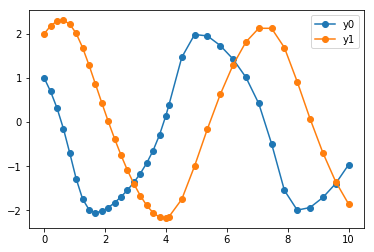

In [3]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='y0')
plt.plot(sol.t, sol.y[1], marker='o', label='y1')
plt.legend()

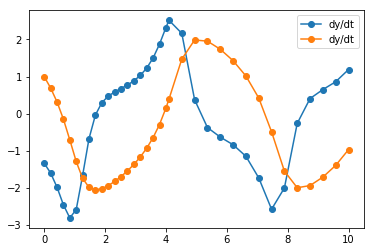

In [4]:
# reference solution using scipy package
plt.plot(sol.t, f(sol.t, sol.y)[0], marker='o', label='dy/dt')
plt.plot(sol.t, f(sol.t, sol.y)[1], marker='o', label='dy/dt')
plt.legend()

# Neural Net Training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [1, 2] 
Numnber of hidden units:   20 
Number of training points: 35 

In [14]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  6045645.4916


/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in cosh
  return f_raw(*args, **kwargs)
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:88: RuntimeWarning: overflow encountered in square
  defvjp(anp.tanh,   lambda ans, x : lambda g: g / anp.cosh(x) **2)
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: invalid value encountered in multiply
  la

iteration: 100 loss:  0.145486829882
iteration: 200 loss:  0.0475744617723
iteration: 300 loss:  0.022460026459
iteration: 400 loss:  0.0162502923293
iteration: 500 loss:  0.0121487172167
iteration: 600 loss:  0.00946136468961
iteration: 700 loss:  0.00884115483164
iteration: 800 loss:  0.00443999424993
iteration: 900 loss:  0.00193660770172
         Current function value: 0.001255
         Iterations: 1000
         Function evaluations: 1092
         Gradient evaluations: 1084
CPU times: user 7.13 s, sys: 62.3 ms, total: 7.2 s
Wall time: 7.26 s


# Verifying training set

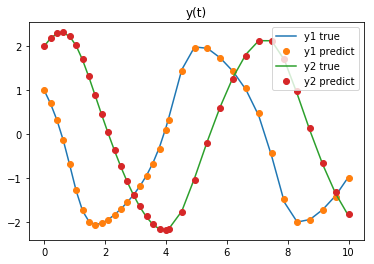

In [15]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
#plt.xlim((0, 3))
plt.title('y(t)')


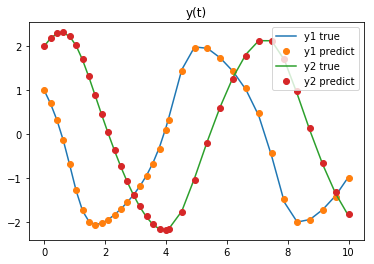

In [16]:
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
#plt.xlim((0, 3))
plt.title('y(t)')

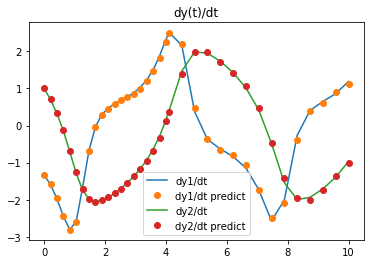

In [17]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')